The following will define our data generation function, that we will be using throughout the exercise.

In [21]:
from sklearn.datasets import make_moons
import math
import numpy as np
import matplotlib.pyplot as plt

def get_train_test_data(n_samples_list=None, seed=11121):
    """
    Generate 2D datasets with different sample sizes from make_moons.
    
    Args:
        n_samples_list (list): List of integers specifying the number of samples for each dataset.
        seed (int): Random seed for reproducibility.
    
    Returns:
        dict: A dictionary where keys are sample sizes and values are tuples of (train_data, test_data).
              Format: {n_samples1: (train_data1, test_data1), n_samples2: (train_data2, test_data2), ...}
    """
    if n_samples_list is None:
        n_samples_list = [50, 100, 1000, 10000]
    generated_datasets = {}
    for n in n_samples_list:
        # Generate the dataset for the specified number of samples
        data_all = make_moons(n_samples=n, noise=0.1, random_state=seed)[0]
        
        # Split into train/test data
        train_n = math.floor(0.8 * n)
        train_data = data_all[:train_n]
        test_data = data_all[train_n:]
        
        # Store the train/test split in the dictionary with sample size as the key
        generated_datasets[n] = (train_data, test_data)
    
    return generated_datasets

# Usage with default sample sizes
generated_datasets = get_train_test_data()

# Loop through datasets by sample size to show size and shape
for n_samples, (train_data, test_data) in generated_datasets.items():
    print(f"Sample Size: {n_samples}")
    print(f"Train Data Shape: {train_data.shape}")
    print(f"Test Data Shape: {test_data.shape}")
    print("-" * 30)

Sample Size: 50
Train Data Shape: (40, 2)
Test Data Shape: (10, 2)
------------------------------
Sample Size: 100
Train Data Shape: (80, 2)
Test Data Shape: (20, 2)
------------------------------
Sample Size: 1000
Train Data Shape: (800, 2)
Test Data Shape: (200, 2)
------------------------------
Sample Size: 10000
Train Data Shape: (8000, 2)
Test Data Shape: (2000, 2)
------------------------------


The following will display a row of scatter plots showing each dataset for different sample sizes.

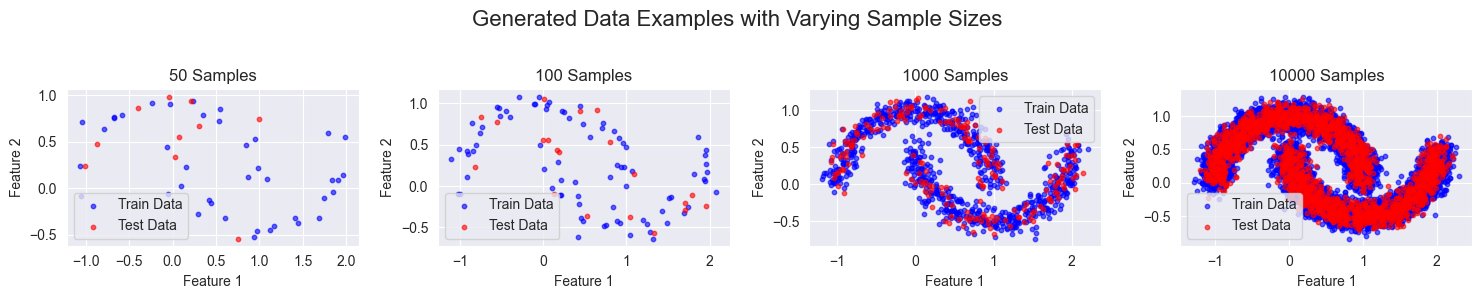

In [22]:
fig, axes = plt.subplots(1, len(generated_datasets), figsize=(15, 3))
fig.suptitle("Generated Data Examples with Varying Sample Sizes", fontsize=16)

for idx, (n_samples, (train_data, test_data)) in enumerate(generated_datasets.items()):
    ax = axes[idx]
    ax.scatter(train_data[:, 0], train_data[:, 1], color="blue", s=10, alpha=0.6, label="Train Data")
    ax.scatter(test_data[:, 0], test_data[:, 1], color="red", s=10, alpha=0.6, label="Test Data")
    ax.set_title(f"{n_samples} Samples")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.legend()

plt.tight_layout(rect=(0, 0, 1, 0.95))
plt.show()

## Models:

### Two-Dimensional Histogram

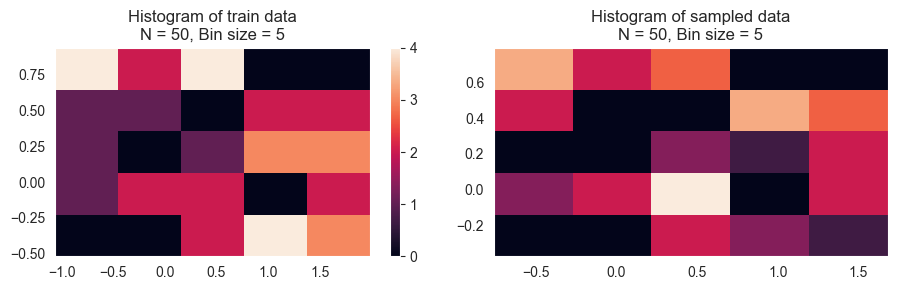

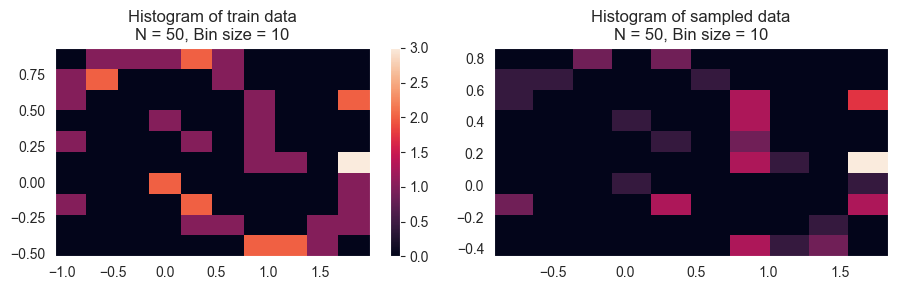

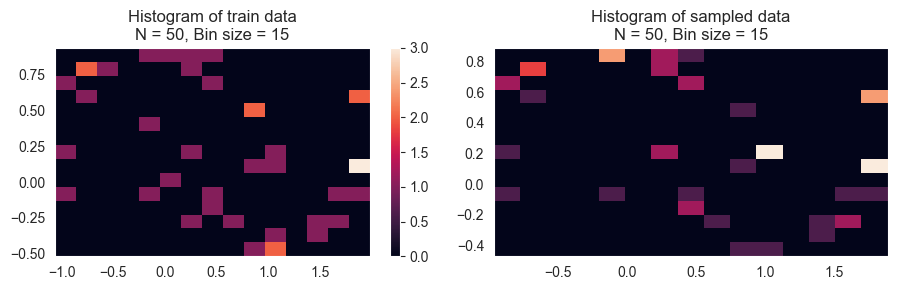

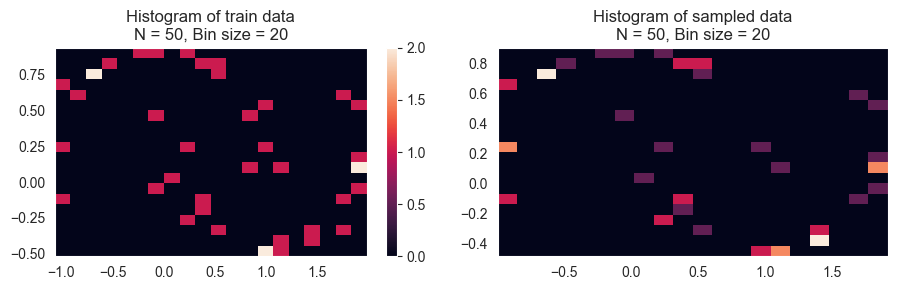

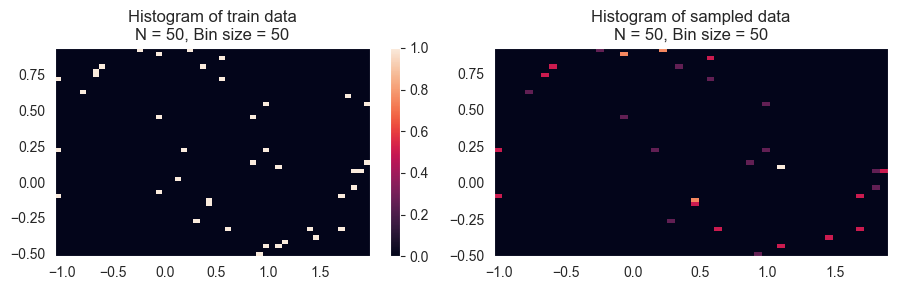

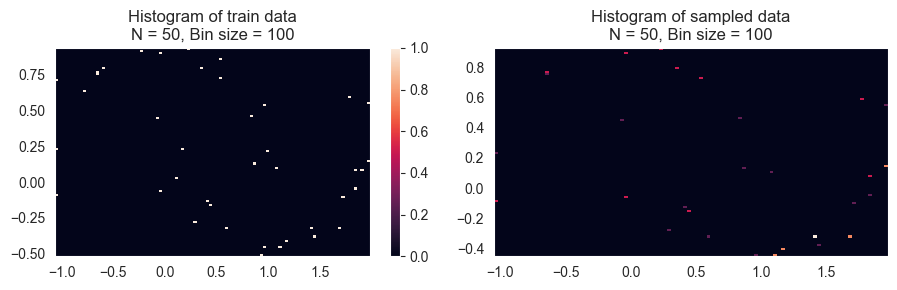

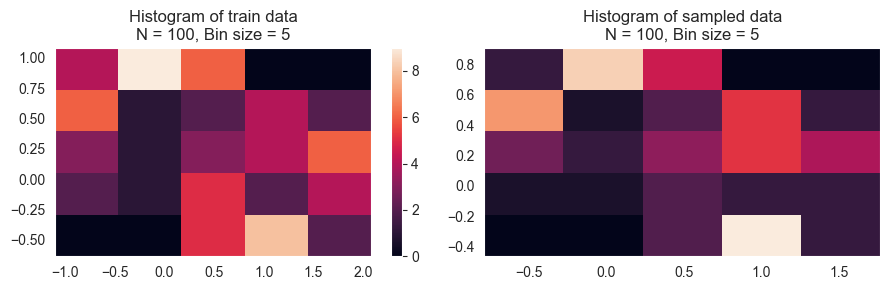

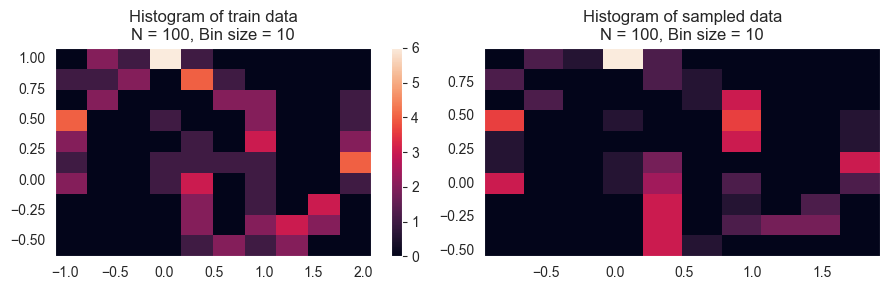

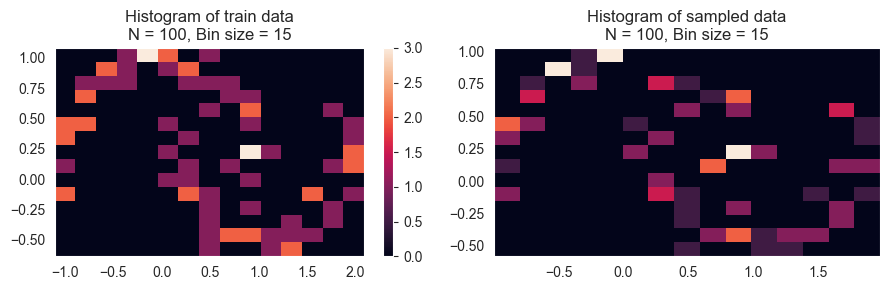

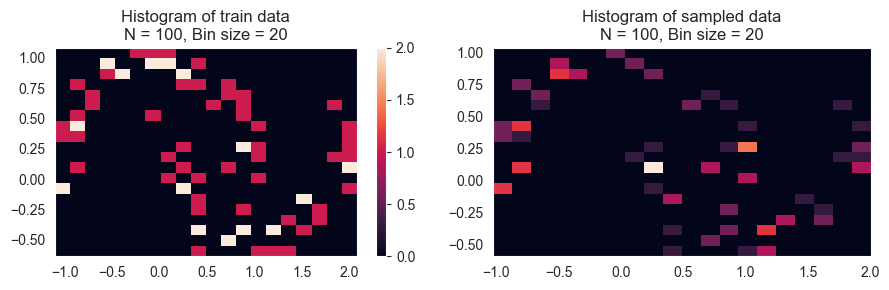

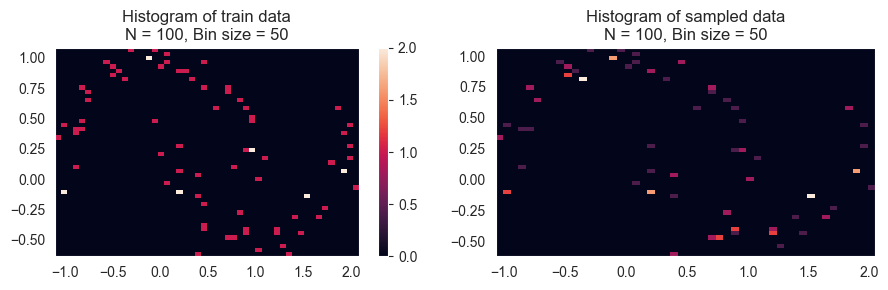

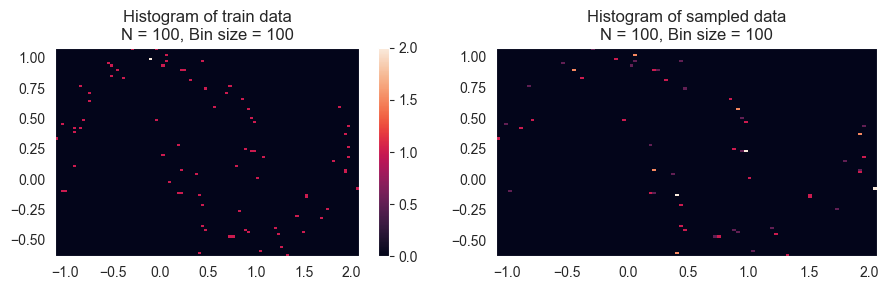

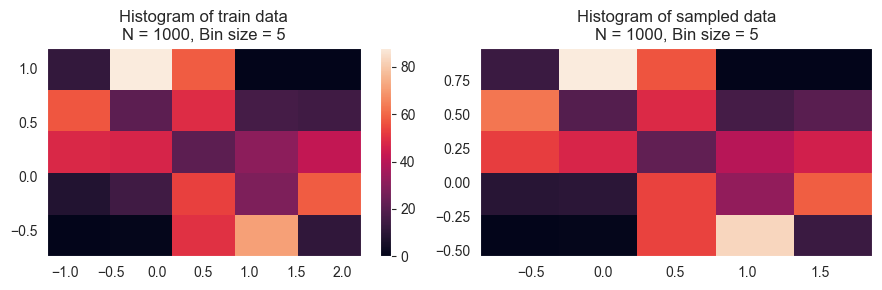

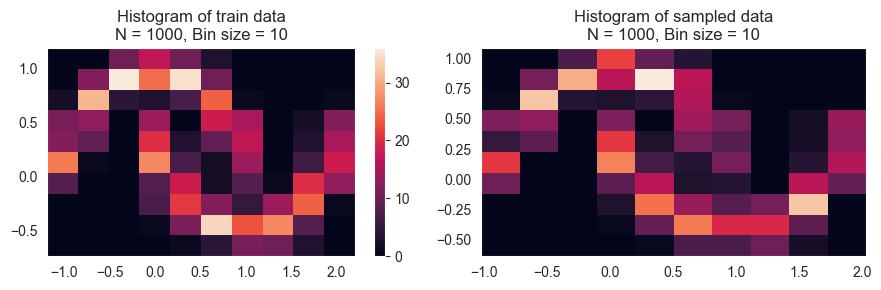

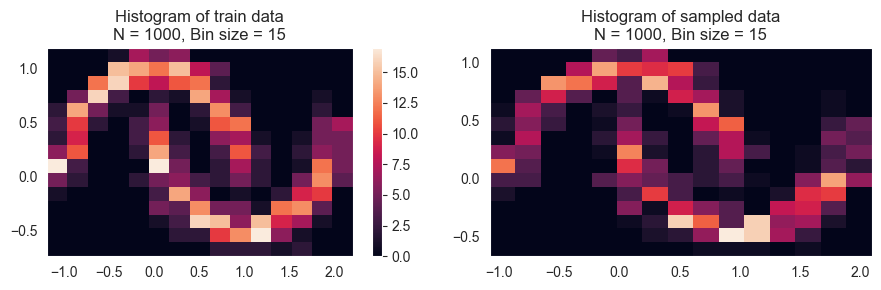

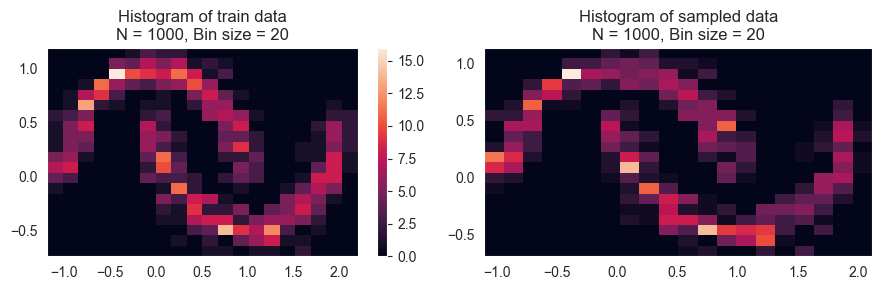

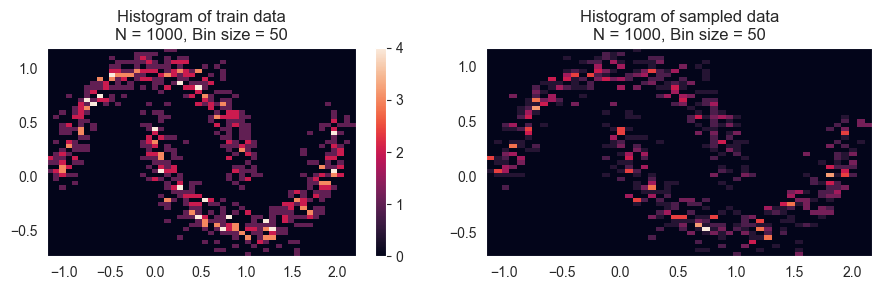

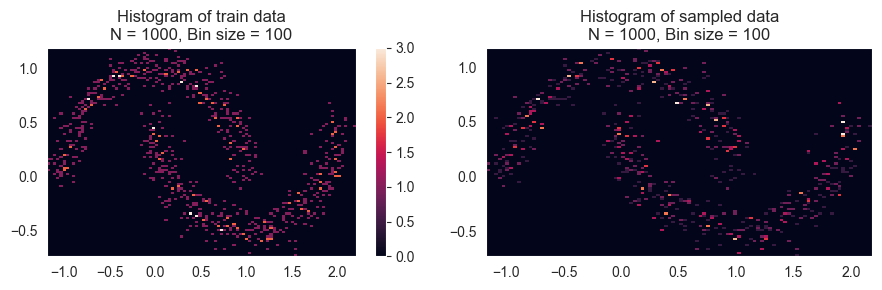

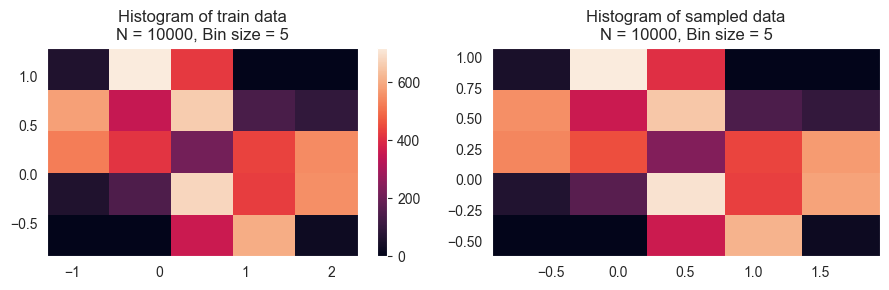

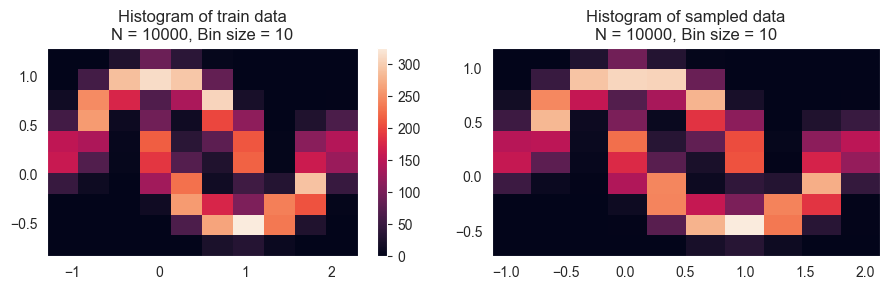

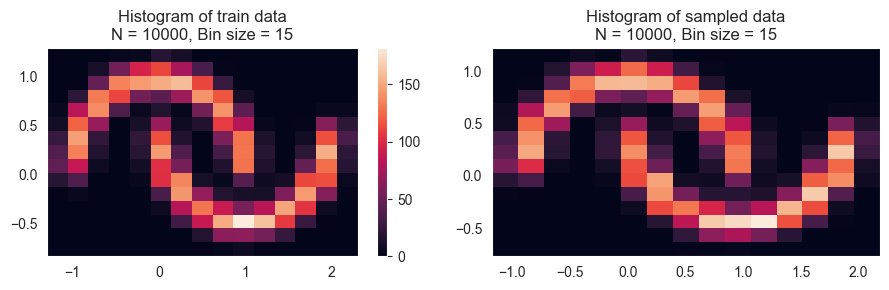

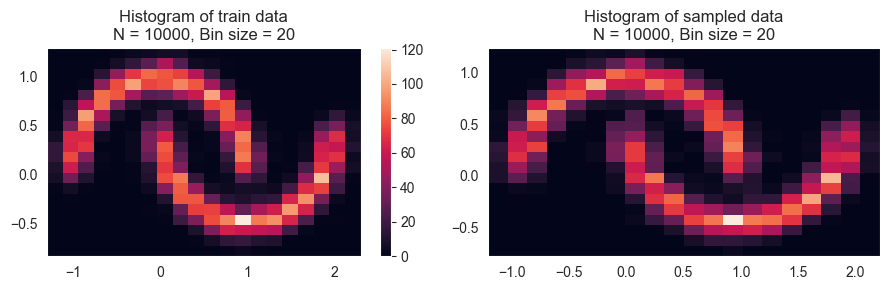

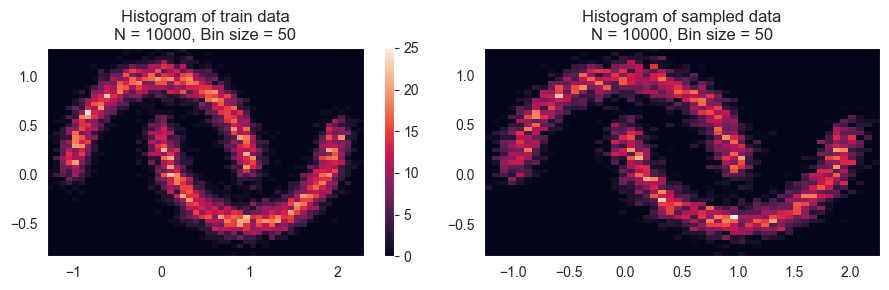

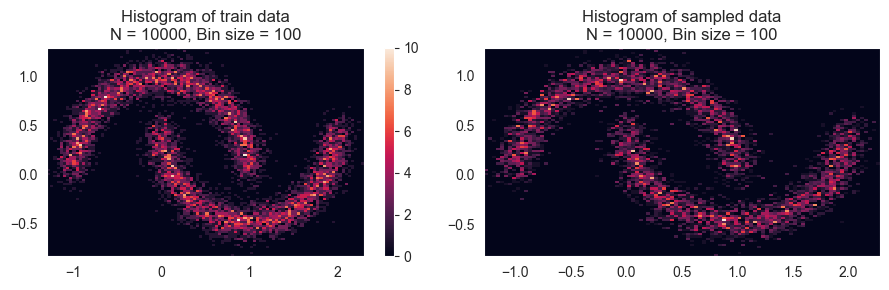

In [30]:
# Define bin sizes for the histogram
bin_sizes = [5, 10, 15, 20, 50, 100]

# Loop through each dataset (by sample size) in generated_datasets
for n_samples, (train_data, test_data) in generated_datasets.items():
    
    for bins in bin_sizes:
        # Calculate for X dimension
        smallest_X = np.min(train_data[:, 0])
        largest_X = np.max(train_data[:, 0])
        sorted_X = train_data[np.argsort(train_data[:, 0])]
        Quantiles_X = np.quantile(sorted_X[:, 0], [0.25, 0.5, 0.75])
        IQR_X = Quantiles_X[2] - Quantiles_X[0]
        Stepsize_X = 2 * IQR_X / pow(80, 1/3)
        CountBins_X = math.ceil((largest_X - smallest_X) / Stepsize_X)

        # Calculate for Y dimension
        smallest_Y = np.min(train_data[:, 1])
        largest_Y = np.max(train_data[:, 1])
        sorted_y = train_data[np.argsort(train_data[:, 1])]
        Quantiles_Y = np.quantile(sorted_y[:, 1], [0.25, 0.5, 0.75])
        IQR_Y = Quantiles_Y[2] - Quantiles_Y[0]
        Stepsize_Y = 2 * IQR_Y / pow(80, 1/3)
        CountBins_Y = math.ceil((largest_Y - smallest_Y) / Stepsize_Y)

        # Create the 2D histogram
        hist, x_bins, y_bins = np.histogram2d(train_data[:, 0], train_data[:, 1], bins=[bins, bins])

        # Get bin centers for sampling
        x_bin_midpoints = (x_bins[:-1] + x_bins[1:]) / 2
        y_bin_midpoints = (y_bins[:-1] + y_bins[1:]) / 2

        # Plot histogram with train data
        fig, axs = plt.subplots(1, 2, figsize=(9, 3))
        h = axs[0].hist2d(train_data[:, 0], train_data[:, 1], bins=(bins, bins))
        axs[0].set_title(f'Histogram of train data\nN = {n_samples}, Bin size = {bins}')
        fig.colorbar(h[3], ax=axs[0])

        # Calculate CDF for sampling
        cdf = np.cumsum(hist.flatten())
        cdf /= cdf[-1]  # Normalize CDF

        # Generate sampled data using the histogram's CDF
        values = np.random.rand(n_samples)
        value_bins = np.searchsorted(cdf, values)
        x_idx, y_idx = np.unravel_index(value_bins, (len(x_bin_midpoints), len(y_bin_midpoints)))
        sampled_data = np.column_stack((x_bin_midpoints[x_idx], y_bin_midpoints[y_idx]))
        new_x, new_y = sampled_data.T

        # Plot histogram of sampled data
        axs[1].hist2d(new_x, new_y, bins=(bins, bins))
        axs[1].set_title(f'Histogram of sampled data\nN = {n_samples}, Bin size = {bins}')

        plt.tight_layout()
        plt.show()

## Single Gaussian

#### Define the Gaussian PDF

For a point $ x $, the PDF for a multivariate Gaussian distribution is:
$$
   p(x) = \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp\left(-\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu)\right)
$$
This formula includes:
   - $ |\Sigma| $: Determinant of the covariance matrix.
   - $ \Sigma^{-1} $: Inverse of the covariance matrix.
   - Exponential term based on the squared distance between $ x $ and $ \mu $.

as found on [Wikipedia](https://en.wikipedia.org/wiki/Multivariate_normal_distribution)


The Single Gaussian Model assumes the data follows a Gaussian distribution with these parameters. Since the actual data distribution is not Gaussian, this model will only be an approximation.

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_mean_and_covariance(data):
    mean = np.mean(data, axis=0)
    covariance = np.cov(data, rowvar=False)
    return mean, covariance

def gaussian_pdf(x, mean, covariance):
    d = len(mean)
    det_covariance = np.linalg.det(covariance)
    inv_covariance = np.linalg.inv(covariance)
    norm_factor = 1 / ((2 * np.pi) ** (d / 2) * det_covariance ** 0.5)
    
    diff = x - mean
    exponent = -0.5 * np.dot(np.dot(diff.T, inv_covariance), diff)
    
    return norm_factor * np.exp(exponent)

def sample_gaussian(mean, covariance, n=1):
    z = np.random.normal(size=(n, len(mean)))
    
    # Transform the samples to match the Gaussian distribution
    eigenvalues, eigenvectors = np.linalg.eig(covariance)
    Lambda_sqrt = np.diag(np.sqrt(eigenvalues))
    
    transformed_samples = z @ Lambda_sqrt @ eigenvectors.T + mean
    
    return transformed_samples

Loop through each dataset (by sample size) in generated_datasets and create:

- Plot (i): Density as contour plot
- Plot (ii): Generate and plot synthetic dataset from Gaussian

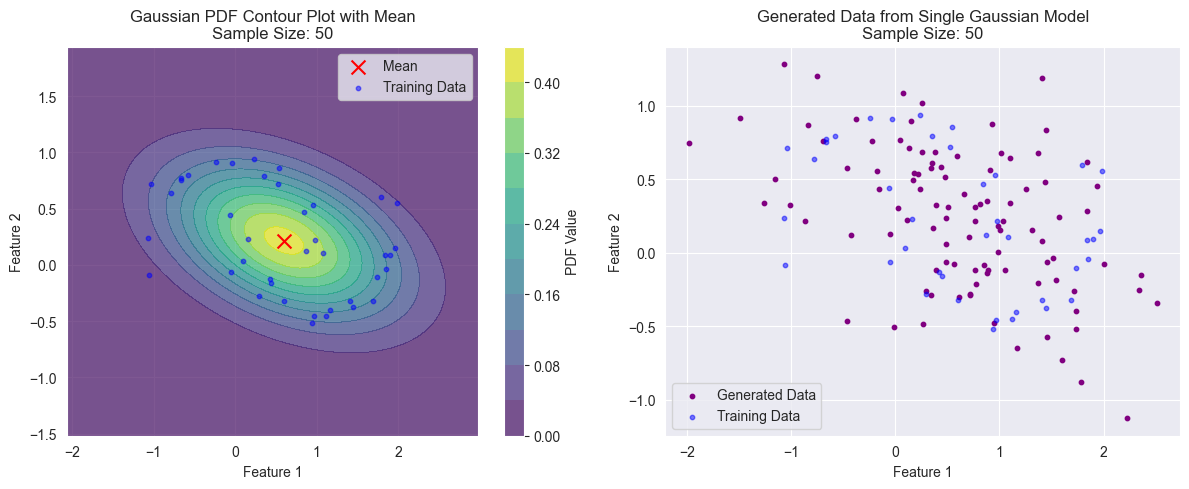

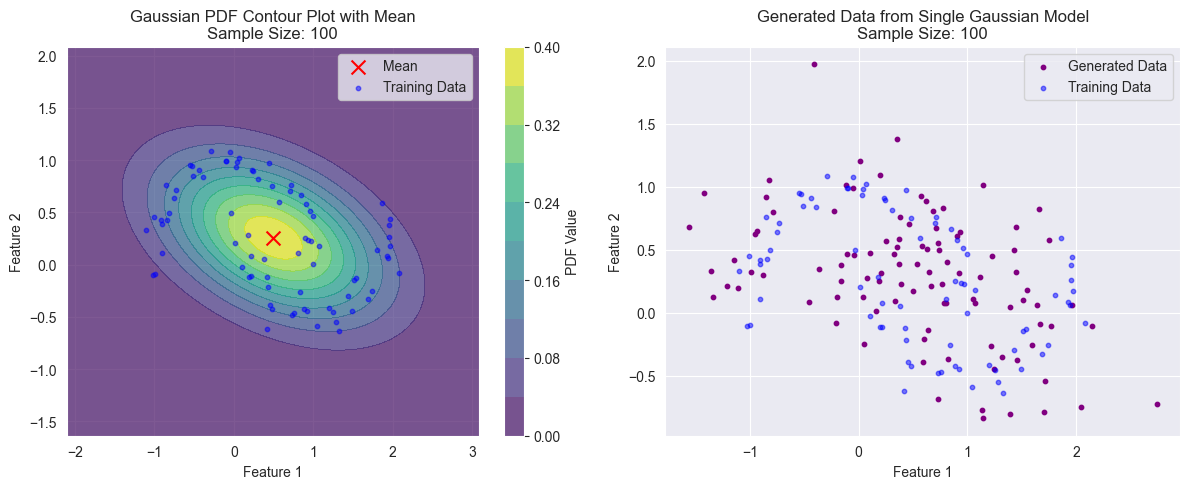

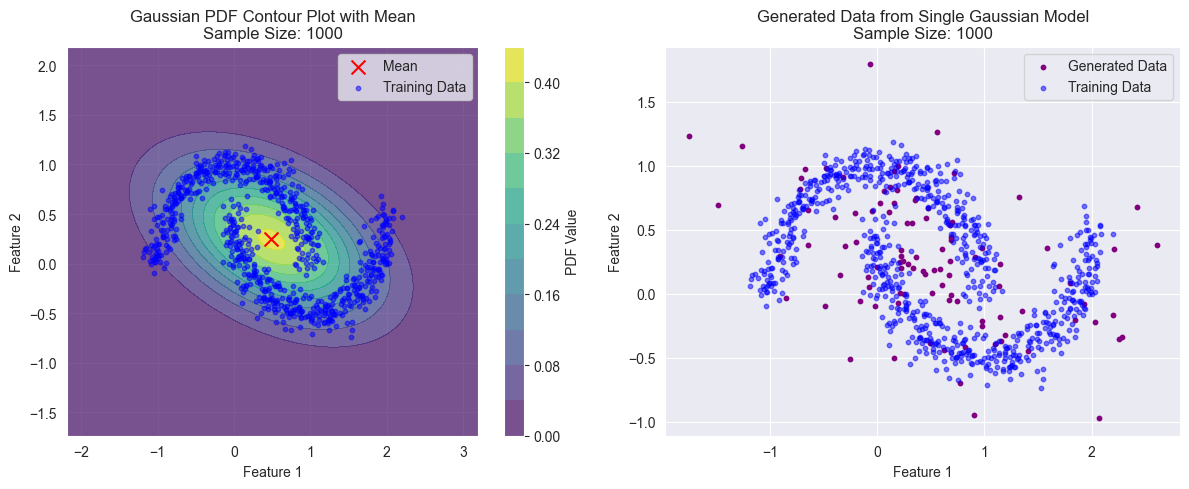

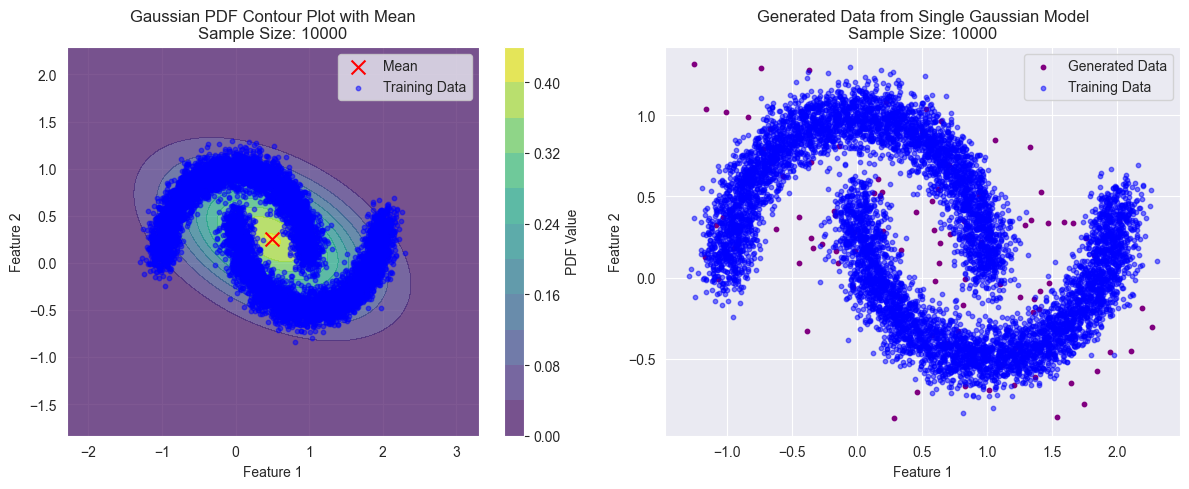

In [32]:
for n_samples, (train_data, test_data) in generated_datasets.items():
    
    # Fit the Gaussian model to the training data
    mean, covariance = calculate_mean_and_covariance(train_data)
    
    # Define grid over the data range for contour plot
    x_min, x_max = train_data[:, 0].min() - 1, train_data[:, 0].max() + 1
    y_min, y_max = train_data[:, 1].min() - 1, train_data[:, 1].max() + 1
    x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Calculate PDF values over the grid for the contour plot
    pdf_values = np.array([
        gaussian_pdf(np.array([x, y]), mean, covariance)
        for x, y in zip(np.ravel(x_grid), np.ravel(y_grid))
    ])
    pdf_values = pdf_values.reshape(x_grid.shape)
    
    # Plot (i): Density as contour plot
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.contourf(x_grid, y_grid, pdf_values, levels=10, cmap="viridis", alpha=0.7)
    plt.colorbar(label="PDF Value")
    plt.scatter(mean[0], mean[1], color="red", marker="x", s=100, label="Mean")
    plt.scatter(train_data[:, 0], train_data[:, 1], color="blue", s=10, alpha=0.5, label="Training Data")
    plt.title(f"Gaussian PDF Contour Plot with Mean\nSample Size: {n_samples}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    
    # Plot (ii): Generate and plot synthetic dataset from Gaussian
    generated_data = sample_gaussian(mean, covariance, n=100)
    
    plt.subplot(1, 2, 2)
    plt.scatter(generated_data[:, 0], generated_data[:, 1], color="purple", s=10, label="Generated Data")
    plt.scatter(train_data[:, 0], train_data[:, 1], color="blue", s=10, alpha=0.5, label="Training Data")
    plt.title(f"Generated Data from Single Gaussian Model\nSample Size: {n_samples}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

## GMM

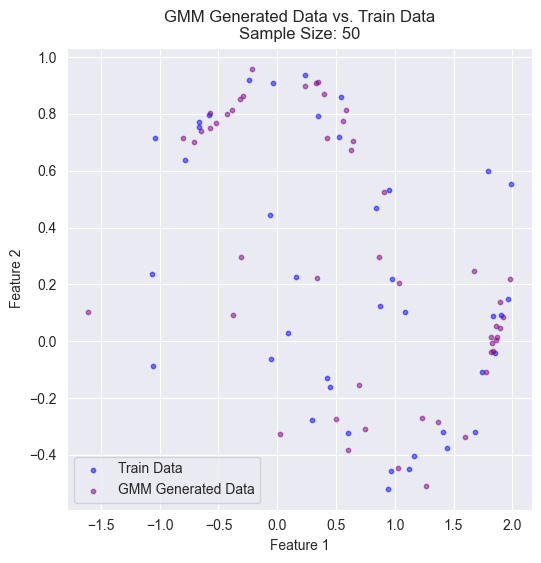

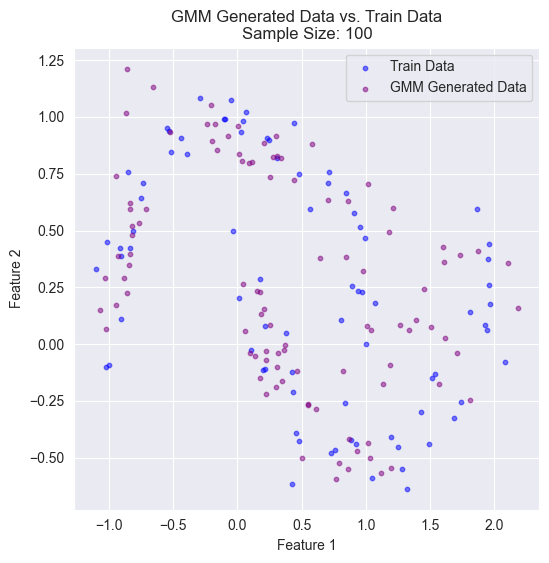

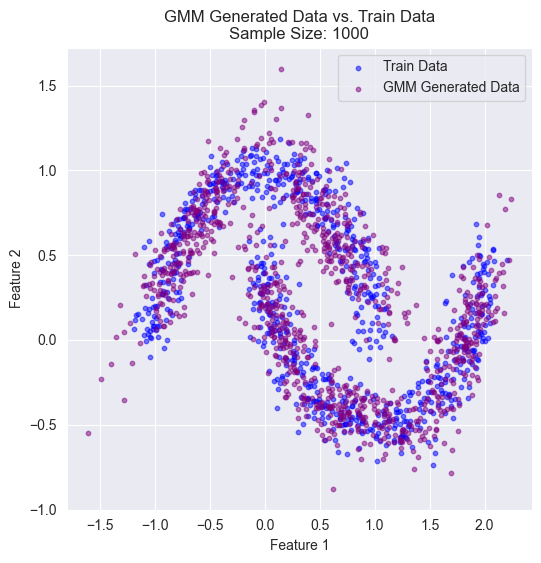

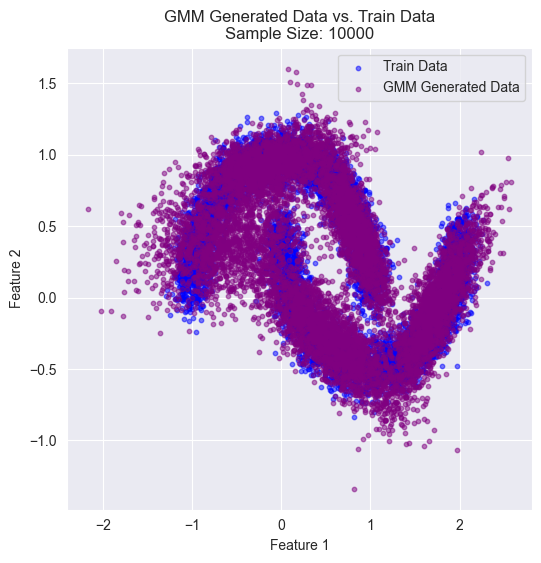

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import multivariate_normal

# Define the GMM helper functions

def random_initialisation(train_data, C, cov_normalisation=0.2, seed=None):
    if seed:
        np.random.seed(seed)
        
    # Weights are uniform
    weights_array = np.ones(C) / C
    
    # Select C data points to act as initial means
    data_indices = np.random.choice(len(train_data), C, replace=False)
    means_array = train_data[data_indices]
    
    # Take empirical covariance and multiply by a normalisation factor for random covariances
    data_empirical_covariance = np.cov(train_data, rowvar=False)
    covariances_array = np.repeat(data_empirical_covariance[np.newaxis], C, axis=0) * cov_normalisation
    return weights_array, means_array, covariances_array

def kmeans_initialisation(train_data, C, seed):
    # Weights are uniform
    weights_array = np.ones(C) / C
    
    # Perform k means clustering; initial means are cluster centers, initial variances are cluster empirical variances
    kmeans = KMeans(n_clusters=C, init='k-means++', random_state=seed).fit(train_data)
    means_array = kmeans.cluster_centers_
    covariances_array = np.zeros((C, 2, 2))
    for k in range(C):
        cluster_data = train_data[kmeans.labels_ == k]
        deviations = cluster_data - means_array[k]
        covariances_array[k] = np.cov(deviations, rowvar=False)
    return weights_array, means_array, covariances_array

def get_influence_array(means_array, covariances_array, weights_array, train_data, C):
    # Store component and full distributions for getting the influence array
    component_dists = [multivariate_normal(means_array[i], covariances_array[i]) for i in range(C)]
    
    # define pdf_values: element i,k is the probability density of datapoint i in component k
    pdf_values = np.array([[dist.pdf(data_point) for dist in component_dists] for data_point in train_data])
    # Define gamma array: gamma_i,k = 'influences of component k on instance i'
    influence_array = weights_array * pdf_values / np.sum(weights_array * pdf_values, axis=1, keepdims=True)
    return influence_array

def update_parameters(train_data, influence_array, C):
    n = len(train_data)
    # Update parameters
    weights_array = np.sum(influence_array, axis=0) / n
    means_array = np.zeros((C, 2))
    for k in range(C):
        means_array[k] = np.sum((influence_array[:, k, np.newaxis] * train_data), axis=0) / (n * weights_array[k])
    covariances_array = np.zeros((C, 2, 2))
    for k in range(C):
        deviations = train_data - means_array[k]
        covariances_array[k] = np.array([influence_array[i, k] * np.outer(deviations[i], deviations[i]) for i in range(n)]).sum(axis=0) / influence_array.sum(axis=0)[k]
    return weights_array, means_array, covariances_array

def make_gmm_pdf(weights_array, means_array, covariances_array):
    def gmm_pdf(x):
        component_dists = [multivariate_normal(means_array[i], covariances_array[i]) for i in range(len(means_array))]
        pdf_value = np.sum([weight * dist.pdf(x) for weight, dist in zip(weights_array, component_dists)])
        return pdf_value
    return gmm_pdf

def train_gmm(train_data, C, num_iter, init_method, init_covariance_normalisation, seed):
    # Get initial guesses
    assert init_method in ['random', 'kmeans++'], 'Invalid initialisation method'
    if init_method == 'random':
        weights_array, means_array, covariances_array = random_initialisation(train_data, C, init_covariance_normalisation, seed)
    elif init_method == 'kmeans++':
        weights_array, means_array, covariances_array = kmeans_initialisation(train_data, C, seed)
        
    # Iterate EM algorithm
    for _ in range(num_iter):
        influence_array = get_influence_array(means_array, covariances_array, weights_array, train_data, C)
        weights_array, means_array, covariances_array = update_parameters(train_data, influence_array, C)
    return weights_array, means_array, covariances_array

def sample_from_gmm(weights_array, means_array, covariances_array, n, seed):
    if seed:
        np.random.seed(seed)
    samples = []
    for _ in range(n):
        # Choose mixture component
        k = np.random.choice(len(weights_array), p=weights_array)
        chosen_mvn = multivariate_normal(means_array[k], covariances_array[k])
        samples.append(chosen_mvn.rvs())
    return np.array(samples)

# Loop through each dataset (by sample size) in generated_datasets
for n_samples, (train_data, test_data) in generated_datasets.items():
    # GMM parameters
    C = 5
    num_iter = 30
    init_method = 'random'  # or 'kmeans++'
    init_covariance_normalisation = 0.1
    seed = 11121

    # Train GMM
    weights_array, means_array, covariances_array = train_gmm(train_data, C, num_iter, init_method, init_covariance_normalisation, seed)

    # Generate samples from the trained GMM
    learned_samples = sample_from_gmm(weights_array, means_array, covariances_array, n_samples, seed)

    # Plot GMM learned samples and original train data
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.scatter(train_data[:, 0], train_data[:, 1], color="blue", s=10, alpha=0.5, label="Train Data")
    ax.scatter(learned_samples[:, 0], learned_samples[:, 1], color="purple", s=10, alpha=0.5, label="GMM Generated Data")
    ax.set_title(f"GMM Generated Data vs. Train Data\nSample Size: {n_samples}")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.legend()
    plt.show()

## KDE

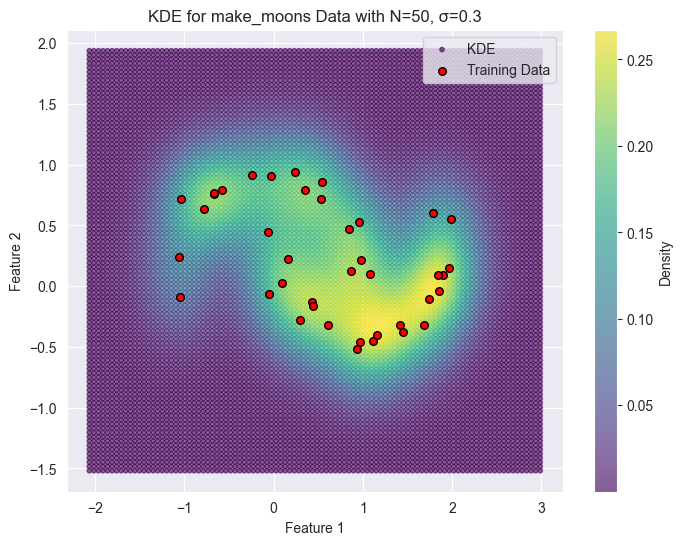

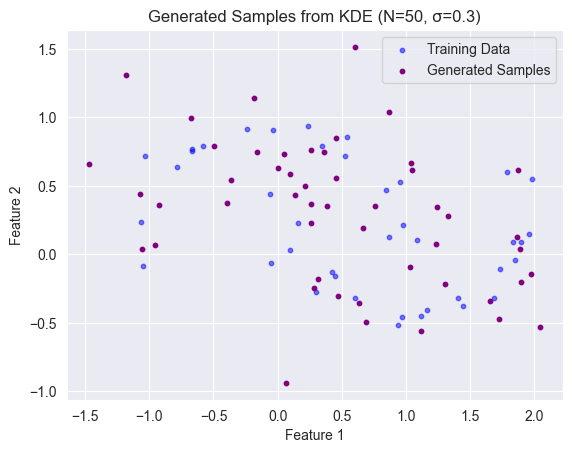

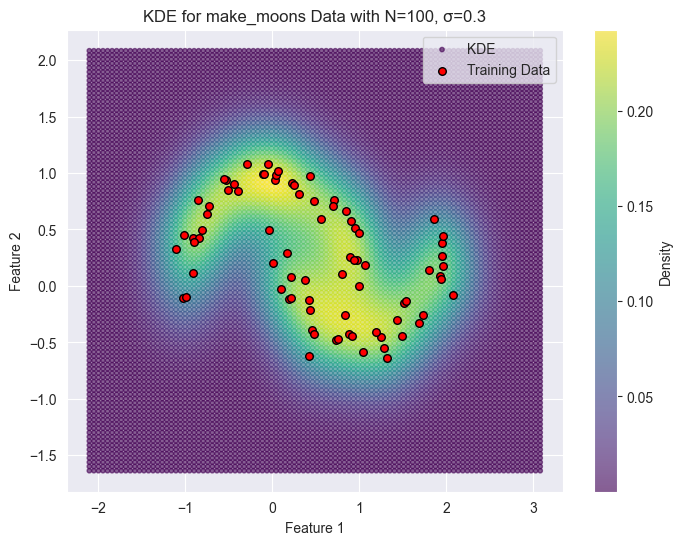

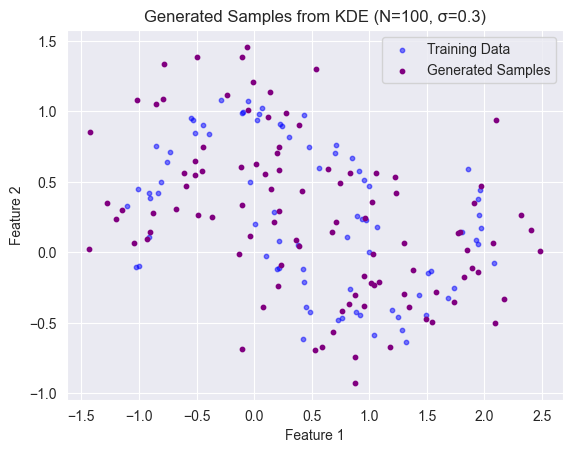

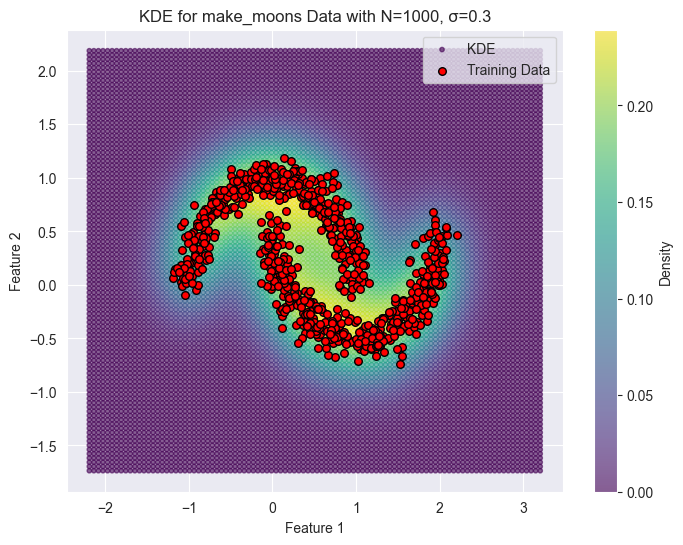

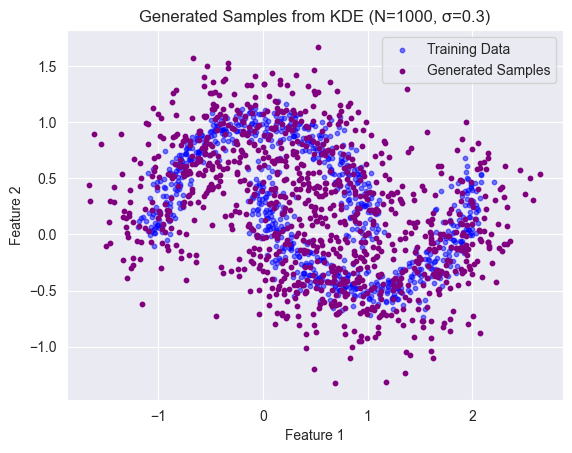

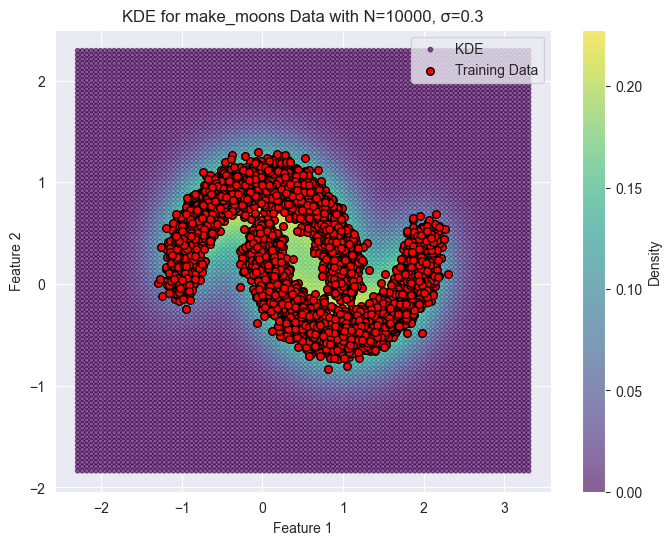

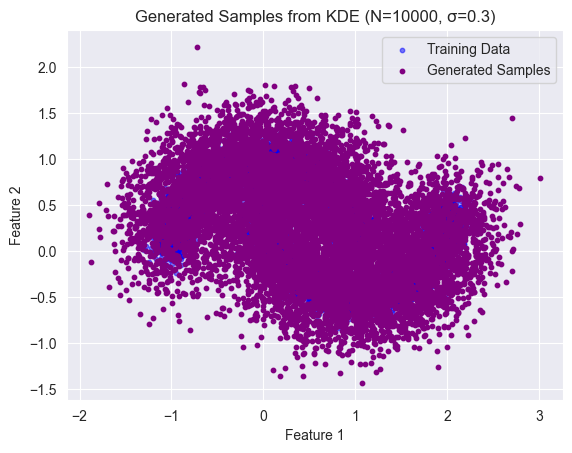

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import math


# KDE functions
def gaussian_kernel(x, data_points, sigma):
    """Calculate the Gaussian kernel values for each data point."""
    diff = x - data_points
    d = data_points.shape[1]
    return (1 / ((2 * np.pi) ** (d / 2) * sigma ** d)) * np.exp(-np.sum(diff ** 2, axis=1) / (2 * sigma ** 2))

def kde(data, x_points, sigma):
    """Calculate KDE values over the grid points."""
    kde_values = np.zeros(x_points.shape[0])
    for i, x in enumerate(x_points):
        kde_values[i] = np.mean(gaussian_kernel(x, data, sigma))  # Vectorized kernel calculation
    return kde_values

def sample_kde(data, sigma, n_samples=1):
    """Generate new samples from the KDE by adding Gaussian noise around data points."""
    points = data[np.random.choice(len(data), n_samples)]
    samples = points + np.random.normal(scale=sigma, size=points.shape)
    return samples

def plot_kde(data, kde_values, x_points, title="KDE for make_moons Data"):
    """Plot the KDE heatmap with training data overlaid."""
    plt.figure(figsize=(8, 6))
    plt.scatter(x_points[:, 0], x_points[:, 1], c=kde_values, cmap="viridis", s=10, alpha=0.6, label="KDE")
    plt.colorbar(label="Density")
    plt.scatter(data[:, 0], data[:, 1], color='red', s=30, edgecolor="black", label="Training Data")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.legend()
    plt.show()

# Usage
if __name__ == "__main__":
    generated_datasets = get_train_test_data()

    for n_samples, (train_data, test_data) in generated_datasets.items():
        # Define evaluation points for the KDE
        x_min, x_max = train_data[:, 0].min() - 1, train_data[:, 0].max() + 1
        y_min, y_max = train_data[:, 1].min() - 1, train_data[:, 1].max() + 1
        x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        x_points = np.c_[x_grid.ravel(), y_grid.ravel()]  # Flatten the grid points for evaluation

        sigma = 0.3  # Bandwidth parameter, adjust as needed
        kde_values = kde(train_data, x_points, sigma)
        kde_values = kde_values.reshape(x_grid.shape)  # Reshape to match the grid for plotting

        # Plot KDE heatmap with training data
        plot_kde(train_data, kde_values, x_points, title=f"KDE for make_moons Data with N={n_samples}, σ={sigma}")

        # Generate and plot samples from KDE
        generated_samples = sample_kde(train_data, sigma, n_samples=n_samples)
        plt.figure()
        plt.scatter(train_data[:, 0], train_data[:, 1], color='blue', s=10, alpha=0.5, label="Training Data")
        plt.scatter(generated_samples[:, 0], generated_samples[:, 1], color='purple', s=10, label="Generated Samples")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.legend()
        plt.title(f"Generated Samples from KDE (N={n_samples}, σ={sigma})")
        plt.show()
